## <font color=purple >Heart Disease Prediction
## <font color=purple >Introduction:

### <font color=black > We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

# Data contains:

 * age - age in years
 * sex - (1 = male; 0 = female)
 * cp - chest pain type (typical angina(common),atypical angina,non-anginal pain(non-heart related),asymptomatic(mixture)) 
 * trestbps - resting blood pressure (in mm Hg on admission to the hospital)
 * chol - serum cholestoral in mg/dl (250> increses 
 * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
 * restecg - resting electrocardiographic results 
 * thalach - maximum heart rate achieved
 * exang - exercise induced angina (1 = yes; 0 = no)
 * oldpeak - ST depression induced by exercise relative to rest 
 * slope - the slope of the peak exercise ST segment
 * ca - number of major vessels (0-3) colored by flourosopy 
 * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect (thaladium)
 * target - have disease or not (1=yes, 0=no)
 * cp', 'thal' and 'slope' are categorical variables

## Advantages:
- User/clients/paitients can talk about their Heart Disease and get instant diagnosis.
- it is Very useful in case of emergency.
- Use of various graphs to help understand and visualise the outputs and inputs.
- 82.42% accuracy achived for the datasets provided using random forest.

## Disdvantages:
- The system is not fully automated, it needs data from user/clients for full diagnosis.
- If used in real time, will have to update the dataset regularly.

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd
# Start Python Imports
import math, time, random, datetime
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Heart Disease1.csv")
df.shape

(303, 14)

### <font color=green > Comment: There are 303 rows and 14 columns in the data set.

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#To get the list of columns in the data set.
print(list(df.columns))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [5]:
#Data types
#We review the data types for each column(each variable) in the data set.
df.dtypes

age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#To Check missing values present in the data set or not-
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### <font color=green > Comment: Null values are not present in the given data.

In [7]:
#by using describe() we can find discriptive statistics.(Five number summary,count and mean)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
slope,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

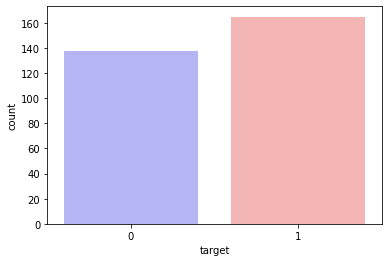

In [9]:
#target - have disease or not (1=yes, 0=no)
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

### <font color=green > In this data set, the rate of disease is seen maximum.

In [10]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [11]:
df.sex.value_counts()

Male      207
Female     96
Name: sex, dtype: int64

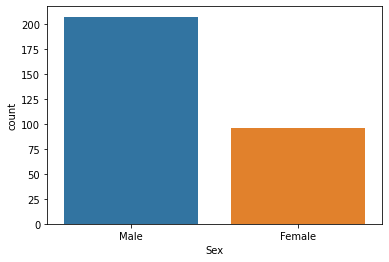

In [12]:
sns.countplot(df['sex'])
plt.xlabel("Sex")
plt.show()

### <font color=green > Comment: From the above graph we say that the frequency of Male is larger than the frequency of Female in the data set.

In [40]:
#Male State & target 1 & 0
male_andtarget_on=len(df[(df['sex']==1)&(df['target']==1)])
print('male have HD',male_andtarget_on)
male_andtarget_off=len(df[(df['sex']==1)&(df['target']==0)])
print('male have not HD',male_andtarget_off)
#sns.barplot(x=['Male having HD','Male not having HD'],y=[male_andtarget_on,male_andtarget_off])

male have HD 93
male have not HD 114


In [41]:
#Female State & target 1 & 0
female_andtarget_on=len(df[(df.sex==0)&(df['target']==1)])
print('female have HD',female_andtarget_on)
female_andtarget_off=len(df[(df.sex==0)&(df['target']==0)])
print('female have not HD',female_andtarget_off)
#sns.barplot(x=['Female having HD','Female not having HD'],y=[female_andtarget_on,female_andtarget_off])

female have HD 72
female have not HD 24


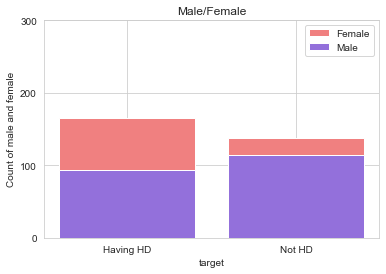

In [42]:
import numpy as np
import matplotlib.pyplot as plt
n = 2
Male=(93,114)
Female=(72,24)
x = np.arange(n)
p1 = plt.bar(x, Male,color='mediumpurple')
p2 = plt.bar(x, Female,color='lightcoral', bottom=Male)
plt.ylabel('Count of male and female')
plt.xlabel('target')
plt.title('Male/Female')
plt.xticks(x, ("Having HD","Not HD"))
plt.yticks(np.arange(0,350,100))
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.show()

## In this section, the rate of disease is more in the data set.

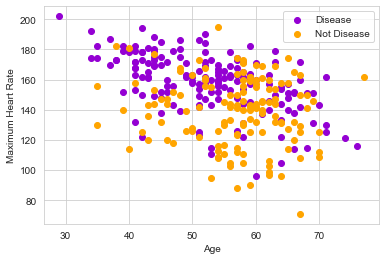

In [43]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="darkviolet")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="orange")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

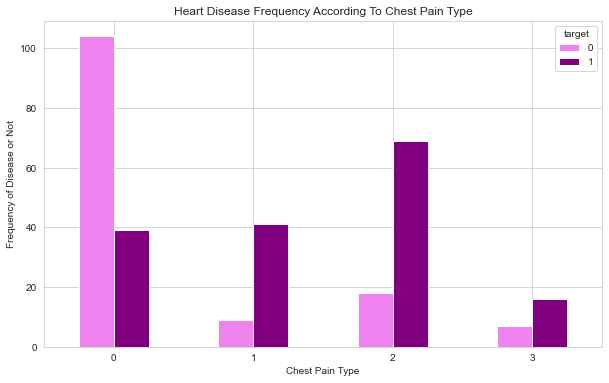

In [44]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=['violet','purple' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [45]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

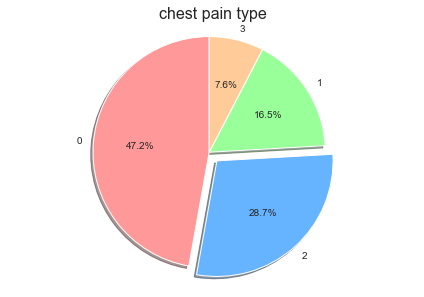

In [46]:
# Pie chart
labels =df.cp.value_counts().index
sizes = df.cp.value_counts().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0,0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("chest pain type",fontsize=16)
plt.show()

### cp - chest pain type (typical angina(common),atypical angina,non-anginal pain(non-heart related),asymptomatic(mixture)) 

In [47]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [48]:
#Import label encoder 
from sklearn import preprocessing   
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()  
# Encode labels in column 'species'. 
z=['sex']
for i in z:
    df[i]= label_encoder.fit_transform(df[i])   
    df[i].unique()   

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [51]:
# Normalize
#X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

## <font color=purple > Train Test Split:

### We will split our data. 70% of our data will be train data and 30% of it will be test data.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y, train_size = 0.70,
                                            test_size = 0.30, random_state = 0)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


In [54]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [55]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3


## <font color=purple > Random Forest:

In [57]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 80,random_state = 101).fit(X_train,y_train)
#n_estimators=no of trees.
print(rf)
print('Accuracy of Bagging classifier on training set: {:.4f}'.format(rf.score(X_train, y_train)))
print('Accuracy of Bagging classifier on test set: {:.4f}'.format(rf.score(X_test, y_test)))
prediction=rf.predict(X_test)
#print(prediction)
confusion = confusion_matrix(y_test, rf.predict(X_test))
print(confusion)

RandomForestClassifier(n_estimators=80, random_state=101)
Accuracy of Bagging classifier on training set: 1.0000
Accuracy of Bagging classifier on test set: 0.8242
[[32 12]
 [ 4 43]]


## <font color=purple > Naive Bayes Classification:

In [58]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb_mod = GaussianNB().fit(X_train, y_train)
print('Accuracy of Naive Bayes classifier on training set: {:.4f}'.format(nb_mod.score(X_train, y_train)))
print('Accuracy of  Naive Bayes classifier on test set: {:.4f}'.format(nb_mod.score(X_test, y_test)))
confusion = confusion_matrix(y_test, nb_mod.predict(X_test))
print(confusion)
#Prior probability
nb_mod.class_prior_
(pd.Series(y_train).value_counts())/(pd.Series(y_train).count())        #it gives prob of l,h,m salary

Accuracy of Naive Bayes classifier on training set: 0.8443
Accuracy of  Naive Bayes classifier on test set: 0.8022
[[32 12]
 [ 6 41]]


1    0.556604
0    0.443396
dtype: float64

## <font color=purple >  Decision Tree:

In [59]:
# Decision Tree
#from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
tree_mod1 = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(tree_mod1.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(tree_mod1.score(X_test, y_test)))
confusion = confusion_matrix(y_test, tree_mod1.predict(X_test))
print(confusion)

Accuracy of Decision Tree Classifier on training set: 0.9906
Accuracy of Decision Tree Classifier on test set: 0.7473
[[33 11]
 [12 35]]


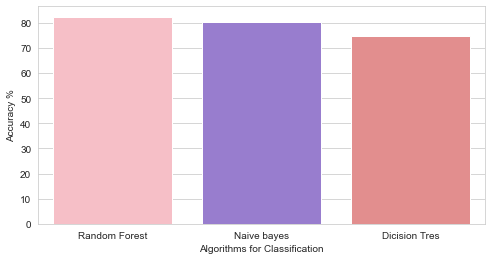

In [64]:
#colors = ["purple", "green", "orange","#CFC60E","#0FBBAE"] 'cornflowerblue'
colors = ['lightpink','mediumpurple','lightcoral']
accuracies=[82.42,80.22,74.73]
Labels=["Random Forest","Naive bayes","Dicision Tres"]
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms for Classification")
sns.barplot(x=Labels, y=accuracies, palette=colors)
plt.show()

In [65]:
import joblib
import pickle
pickle.dump(rf, open("pima.pickle", "wb"))

In [66]:
#pickle.dump(rf, open("pima.pickle.dat", "wb"))

In [74]:
from tkinter import*
from PIL import ImageTk, Image
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle
root=Tk()
root.geometry("800x800")
root.configure(background="White")
def rfmodel(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
    loaded_model = pickle.load(open("pima.pickle", "rb"))
    prediction = loaded_model.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])  #order important
    if prediction == [0]:
        notif1.configure(text="A Patients Have not Heart Disease")
    else:
        notif1.configure(text="A patient have heart disease")

#Exit App
def exit_app():
    root.destroy()
        
Head2 = Label(root,text="Heart Disease Prediction",font=('Helvetica',25,'bold',"underline"),relief="solid").pack(pady=(6,0))    

Age=Label(root,text="Age (in years)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=80)
Age_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Age_input.place(x=400,y=80)

Sex=Label(root,text="Sex (0:Female,1:Male)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=110)
Sex_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Sex_input.place(x=400,y=110)

CP=Label(root,text="Chest pain type (0-3)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=140)
CP_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
CP_input.place(x=400,y=140)

trestbps=Label(root,text="Resting blood pressure (in mm Hg)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=170)
trestbps_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
trestbps_input.place(x=400,y=170)

chol=Label(root,text="Serum cholestoral in mg/dl(250>increses )",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=200)
chol_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
chol_input.place(x=400,y=200)

fbs=Label(root,text="Fasting blood sugar>120 in mg/dl(0:F,1:T)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=230)
fbs_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
fbs_input.place(x=400,y=230)

restecg=Label(root,text="Restecg (0-2)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=260)
restecg_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
restecg_input.place(x=400,y=260)

thalach=Label(root,text="Maximum heart rate achieved ",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=290)
thalach_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
thalach_input.place(x=400,y=290)

exang=Label(root,text="Exercise induced angina (1 = yes; 0 = no)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=320)
exang_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
exang_input.place(x=400,y=320)

oldpeak=Label(root,text="Oldpeak",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=350)
oldpeak_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
oldpeak_input.place(x=400,y=350)

slope=Label(root,text="Slope (0-2)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=380)
slope_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
slope_input.place(x=400,y=380)

ca=Label(root,text="No of major vessels color by flourosopy (0-3)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=410)
ca_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
ca_input.place(x=400,y=410)

thal=Label(root,text="Thal (0-3)",font=('Helvetica',10,'bold'),bg="light pink",relief="solid",width=35).place(x=60,y=440)
thal_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
thal_input.place(x=400,y=440)

but1 = Button(root,text="Prediction",width="20", height="2",command=lambda: rfmodel(Age_input.get(),Sex_input.get(),CP_input.get(),trestbps_input.get(),chol_input.get(),fbs_input.get(),restecg_input.get(),thalach_input.get(),exang_input.get(),oldpeak_input.get(),slope_input.get(),ca_input.get(),thal_input.get()))
button_exit = Button(root, text = "Exit", width="15", height="1", command = exit_app) 
notif1 = Label(root, text="",font=("Arial sans MS",14,"bold"))

but1.place(x=300,y=480)
button_exit.place(x=320,y=600)
notif1.place(x=200,y=550)
root.resizable(0,0)
root.mainloop()

